In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.读取数据

In [5]:
df_neighbor = pd.read_csv(r'../../file/subject/station_ana.csv')
df_neighbor.head(2)

,Unnamed: 0,编号,车次,发车站,到达站,发车时间,商务特等座,动卧,一等座,二等座,无座,记录日期,记录时间,余票总数,停售时间,始终站,停靠站,相邻站
0,0,4f0000D3080F,D305,南京,苏州,03:30,0,0,0,117,18,2016-12-21,03:00,135,03:00,"['南京', '苏州']","['西安北', '渭南北', '华山北', '三门峡南', '洛阳龙门', '郑州东', '...","[['西安北', '渭南北'], ['渭南北', '华山北'], ['华山北', '三门峡南..."
1,2,4f0000D3080F,D305,苏州,上海,05:34,0,0,0,84,18,2016-12-21,05:04,102,05:04,"['苏州', '上海']","['西安北', '渭南北', '华山北', '三门峡南', '洛阳龙门', '郑州东', '...","[['西安北', '渭南北'], ['渭南北', '华山北'], ['华山北', '三门峡南..."


### 2.获取某站上下乘客数，以昆山为例

#### 2.1.获取到达和出发数据

In [6]:
df_to_kunshan = df_neighbor[df_neighbor['到达站'].str.contains('昆山')]
df_from_kunshan = df_neighbor[df_neighbor['发车站'].str.contains('昆山')]

#### 2.2合并数据

In [7]:
df_kunshan = pd.merge(df_to_kunshan,df_from_kunshan,on='编号')
df_kunshan.columns

Index(['Unnamed: 0_x', '编号', '车次_x', '发车站_x', '到达站_x', '发车时间_x', '商务特等座_x',
       '动卧_x', '一等座_x', '二等座_x', '无座_x', '记录日期_x', '记录时间_x', '余票总数_x',
       '停售时间_x', '始终站_x', '停靠站_x', '相邻站_x', 'Unnamed: 0_y', '车次_y', '发车站_y',
       '到达站_y', '发车时间_y', '商务特等座_y', '动卧_y', '一等座_y', '二等座_y', '无座_y',
       '记录日期_y', '记录时间_y', '余票总数_y', '停售时间_y', '始终站_y', '停靠站_y', '相邻站_y'],
      dtype='object')

#### 2.3获取乘客流量

In [12]:
#apply应用
df_kunshan['乘客流量'] = df_kunshan.apply(lambda x:x['余票总数_x'] - x['余票总数_y'],axis=1)

In [14]:
#更简洁的方法
df_kunshan['乘客流量'] = df_kunshan['余票总数_x'] - df_kunshan['余票总数_y']
df_kunshan.tail(2)

,Unnamed: 0_x,编号,车次_x,发车站_x,到达站_x,发车时间_x,商务特等座_x,动卧_x,一等座_x,二等座_x,...,二等座_y,无座_y,记录日期_y,记录时间_y,余票总数_y,停售时间_y,始终站_y,停靠站_y,相邻站_y,乘客流量
65,2660,490000G45805,G455,无锡东,昆山南,21:41,19,0,141,423,...,490,0,2016-12-21,21:28,651,21:28,"['昆山南', '上海虹桥']","['荣成', '威海', '牟平', '烟台南', '莱阳', '即墨北', '潍坊', '...","[['荣成', '威海'], ['威海', '牟平'], ['牟平', '烟台南'], ['...",-68
66,2723,11000G125607,G1257,苏州北,昆山南,22:20,0,10,30,295,...,405,0,2016-12-21,22:07,450,22:07,"['昆山南', '上海虹桥']","['长春', '公主岭南', '四平东', '铁岭西', '沈阳北', '绥中北', '秦皇...","[['长春', '公主岭南'], ['公主岭南', '四平东'], ['四平东', '铁岭西...",-115


In [15]:
df_kunshan_use = df_kunshan[['发车时间_x','乘客流量']]
df_kunshan_use.head()

,发车时间_x,乘客流量
0,07:21,310
1,07:48,122
2,08:03,200
3,08:28,49
4,08:25,174


### 3.可视化

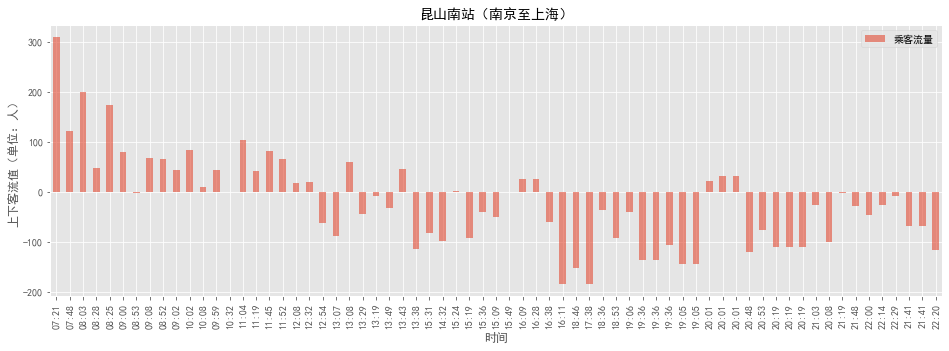

In [24]:
plt.rcParams['font.sans-serif']=['SimHei']#显示中文字体为黑体
plt.rcParams['axes.unicode_minus']=False#显示负号
plt.style.use('ggplot')
df_kunshan_use.plot(x='发车时间_x',y='乘客流量',kind='bar',figsize=(16,5),alpha=0.6)
plt.xlabel('时间',size=12)
plt.ylabel('上下客流值（单位：人）',size=12)
plt.title('昆山南站（南京至上海）',size=14)
plt.show()